## HAM-SPAM CLASSIFICATION


#### Loading and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# removal of null values
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.columns = ['labels', 'texts']

In [6]:
data.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [7]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

In [8]:
# le.fit(data.labels)
# print(le.classes_)
# data.labels = le.transform(data.labels) 

In [9]:
# 0 = ham and 1 = spam
data.head()

,labels,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.describe()

,labels,texts
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
data.groupby('labels').describe()

texts                                                               
       count unique                                                top freq
labels                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [12]:
data['length'] = data['texts'].apply(len)


In [13]:
data.head()

,labels,texts,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
data.length.unique()

array([111,  29, 155,  49,  61, 148,  77, 160, 158, 154, 109, 136, 156,
       196,  35, 149,  26,  81,  58,  41,  53,  88,  57, 144,  30, 134,
        75,  64, 130, 189,  84, 159, 123,  47,  28,  27,  82, 142, 172,
        19,  72,  32,  45,  31,  67, 124,  80, 291, 120,  76, 161,  34,
        22,  40, 108,  48,  25,  56, 110, 153,  46,  42,  20,  43,  73,
        50,  36,  14,  55, 121,  62, 195, 141, 139, 107, 125,  33,  51,
       184, 183,  44,  95, 115,  96, 143,  86, 157,  52, 244,   9,  39,
       126, 162,  38,  59, 384, 146,  85, 152,  74,  94, 105,  65,  66,
        23,  24, 185,  37,  92, 131, 174, 119,  69, 137, 165, 145,  83,
        78, 150, 179,  97,   3, 133, 147,   8,   7,   4,  21,  91,  71,
       138,  79, 128, 232, 151,  63, 129, 202, 168,  15,  54, 300, 102,
       118, 221, 204, 114,  60, 248,  89, 104,  70,  17,  13, 164, 117,
       175, 298,  90,  18,  16, 170, 166,  99, 177, 169, 101, 281, 135,
       103, 100, 140, 127,  87, 269, 163, 226, 181, 132, 122,  9

LENGTHS OF TEXTS


C:\Users\bpakh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


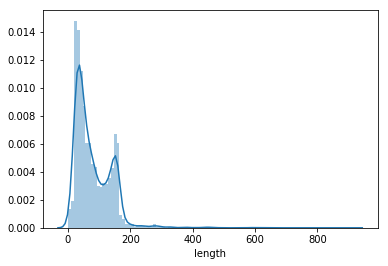

In [15]:
print("LENGTHS OF TEXTS")
# plt.figure(figsize=(16,12))
sns.distplot(data['length'], bins=100)

In [16]:
sample_texts = data[data['length'] == 431]['texts'].iloc[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A051588D68>,
      dtype=object)

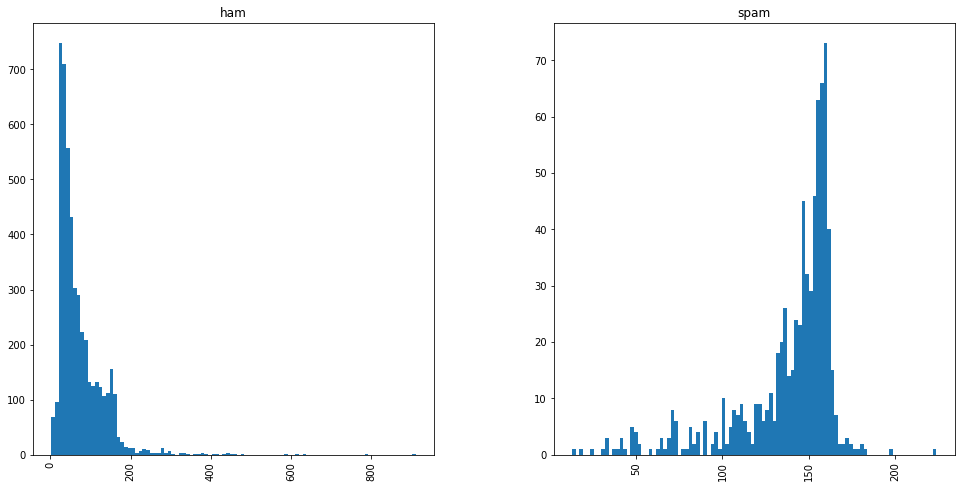

In [17]:
data.hist(column='length', by='labels', bins=100, figsize=(16,8))

In [18]:
# import string
# def remove_junk(texts):
#     punctuation_removed = [char for char in texts if char not in string.punctuation]
#     punctuation_removed = ''.join(punctuation_removed)
#     lower_cased_words = texts.lower()
#     stopwords_removed =  [word for word in lower_cased_words.split() if word not in stopwords.words('english')]
#     return stopwords_removed

In [19]:
# remove_junk(sample_texts)

In [20]:
# data['texts'].head(5).apply(remove_junk)

### CountVectorizer
Converts a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

* analyzer : string, {‘word’, ‘char’, ‘char_wb’} or callable
Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

In [23]:
transformed_fit = vectorizer.fit(data['texts'])

In [24]:
print("Vocabulary Size of Data:", len(transformed_fit.vocabulary_))

Vocabulary Size of Data: 8672


In [25]:
transformed_texts = vectorizer.transform(data['texts'])

In [26]:
print('Shape of matrix: ',transformed_texts.shape)
print('Non zero occurences: ',transformed_texts.nnz)

Shape of matrix:  (5572, 8672)
Non zero occurences:  73916


#### Data Splitting

In [27]:
from sklearn.model_selection import train_test_split
old_X_train,old_X_test,old_y_train,old_y_test = train_test_split(data['texts'],data["labels"], test_size = 0.2, random_state = 10)
X_train,X_test,y_train,y_test = vectorizer.transform(old_X_train),vectorizer.transform(old_X_test),(old_y_train),(old_y_test)
print("X_train = ", X_train.shape[0])
print("X_test  = ",X_test.shape[0])
print("Y_train = ",y_train.shape[0])
print("Y_test  = ",y_test.shape[0])

X_train =  4457
X_test  =  1115
Y_train =  4457
Y_test  =  1115


#### Text Transformation
* stop words removal 
* lower casing strings
* tfidf transformations
* prunning 
* stemming


In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bpakh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bpakh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
def process_strings(strings):
    strings = strings.lower()
    words = word_tokenize(strings)
    stop_words = stopwords.words('English')
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    return words 

In [30]:
ham_words = ' '
spam_words = ' '

for i, text in enumerate(data.texts):
    texts = process_strings(text)
    if data.labels[i] == "ham":
        for text in texts:
            ham_words += text +' '
            
    else:
        for text in texts:
            spam_words += text +' '

#### Data Visualization

In [31]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)


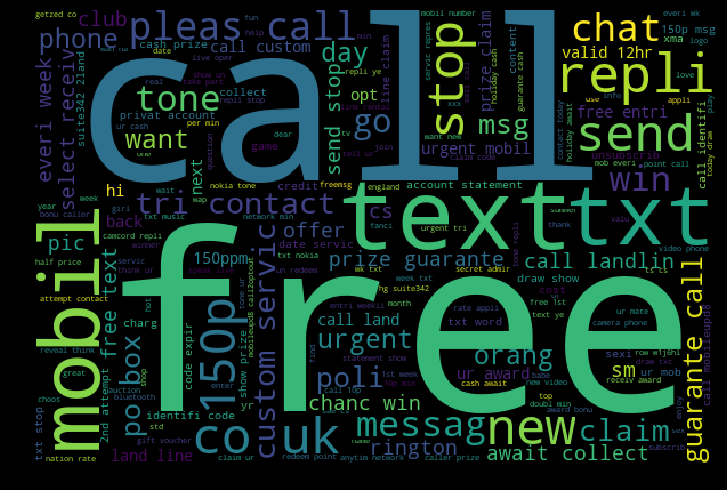

In [32]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

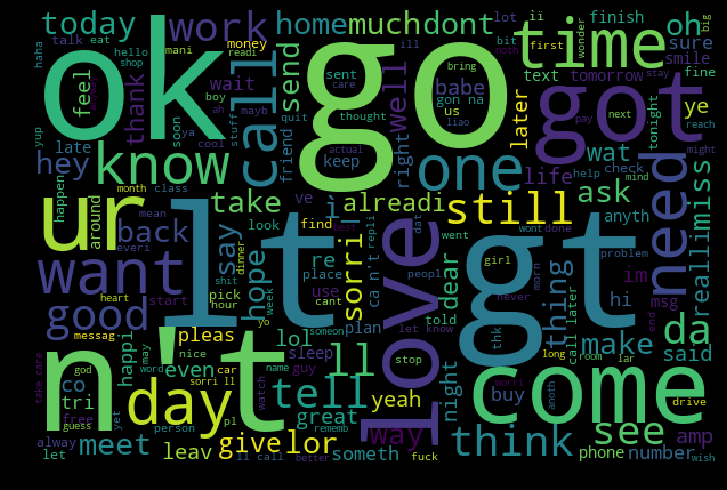

In [33]:
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### TFIDF Transformations

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidf_transform = TfidfTransformer().fit(transformed_texts)

In [36]:
texts_tfidf = tfidf_transform.transform(transformed_texts)

### Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
pred_multinomial = mnb.predict(X_test)
prediction_multinomial = pd.DataFrame(pred_multinomial, columns=['Naive Bayes Predictions'])
accuracy_score(y_test,pred_multinomial)

0.9838565022421525

In [40]:
print(classification_report(y_test, pred_multinomial, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.92      0.96      0.94       150

avg / total       0.98      0.98      0.98      1115



In [41]:
conf_mat = confusion_matrix(y_test, pred_multinomial)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

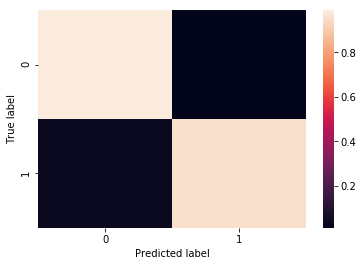

In [42]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lregg = LogisticRegression()
lregg.fit(X_train,y_train)
pred_logistic = lregg.predict(X_test)
prediction_logistic = pd.DataFrame(pred_logistic, columns=['Logistic Regression Predictions'])

In [44]:
accuracy_score(y_test,pred_logistic)

0.9802690582959641

In [45]:
print(classification_report(y_test, pred_logistic, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.98      1.00      0.99       965
       Spam       0.98      0.87      0.92       150

avg / total       0.98      0.98      0.98      1115



In [46]:
conf_mat = confusion_matrix(y_test, pred_logistic)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

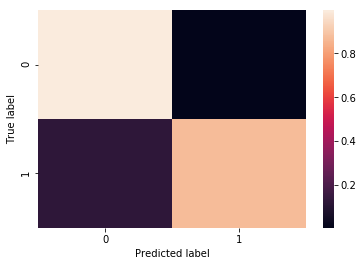

In [47]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### K - Nearest Neighbours


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
prediction_knn = pd.DataFrame(pred_knn, columns=['KNN Predictions'])

In [49]:
accuracy_score(y_test,pred_knn)

0.9524663677130045

In [50]:
print(classification_report(y_test, pred_knn, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.95      1.00      0.97       965
       Spam       0.99      0.65      0.79       150

avg / total       0.95      0.95      0.95      1115



In [51]:
conf_mat = confusion_matrix(y_test, pred_knn)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

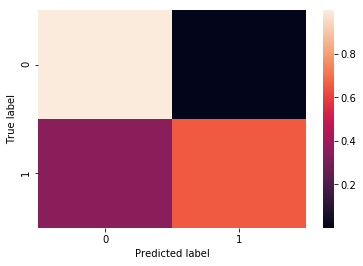

In [52]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

random_forest.fit(X_train,y_train)
pred_rforest =  random_forest.predict(X_test)
prediction_rforest = pd.DataFrame(pred_rforest, columns=['Random Forest Predictions'])

In [54]:
X_test

<1115x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 14729 stored elements in Compressed Sparse Row format>

In [55]:
accuracy_score(y_test,pred_rforest)

0.9659192825112107

In [56]:
print(classification_report(y_test, pred_rforest, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       965
       Spam       0.99      0.75      0.86       150

avg / total       0.97      0.97      0.96      1115



In [57]:
conf_mat = confusion_matrix(y_test, pred_rforest)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

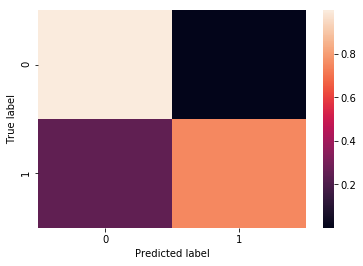

In [58]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')